In [1]:
import pandas as pd

train = pd.read_csv("/kaggle/input/titanic-dataset/train.csv")
test = pd.read_csv("/kaggle/input/titanic-dataset/test.csv")

# First 5 rows check karne ke liye
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [2]:
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [3]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
train.describe()
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train['Survived'].value_counts()
train['Pclass'].value_counts()
train['Sex'].value_counts()
train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

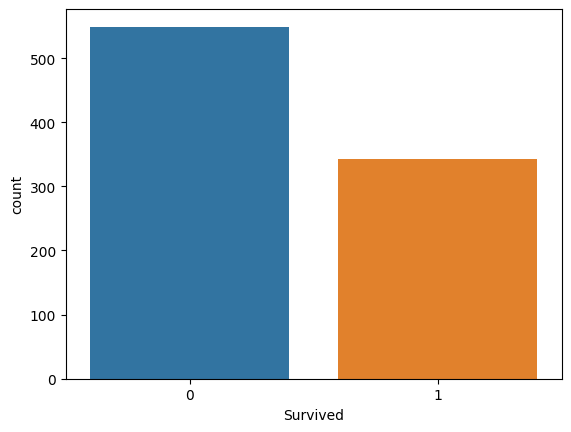

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("/kaggle/input/titanic-dataset/train.csv")
test = pd.read_csv("/kaggle/input/titanic-dataset/test.csv")

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

sns.countplot(x='Survived', data=train)
plt.show()


In [7]:
X = train.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = train['Survived']

X_test_final = test.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.7988826815642458


In [8]:
import pandas as pd

test = pd.read_csv("/kaggle/input/titanic-dataset/test.csv")

# Missing values fill
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# 'Cabin' column agar exist kare to drop
if 'Cabin' in test.columns:
    test = test.drop('Cabin', axis=1)

# Encode 'Sex'
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

# One-hot encoding 'Embarked' (drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

# Ensure columns match train features
X_test_final = test.drop('PassengerId', axis=1)


In [9]:
X_train = train.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
y_train = train['Survived']

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test ke liye same columns
X_test_final = test.drop(['PassengerId','Name','Ticket'], axis=1)

test_pred = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})

submission.to_csv("submission.csv", index=False)


In [10]:
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("Submission file created at /kaggle/working/submission.csv")


Submission file created at /kaggle/working/submission.csv


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv("/kaggle/input/titanic-dataset/train.csv")
test = pd.read_csv("/kaggle/input/titanic-dataset/test.csv")

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

X_train = train.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
y_train = train['Survived']
X_test_final = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission file created at /kaggle/working/submission.csv")


Submission file created at /kaggle/working/submission.csv
